In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn import tree


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('winequality_red.csv', delimiter=';')

# Check dataset structure
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
X = data.drop(columns=['quality'])  # Features
y = data['quality']  # Target variable

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
#scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.39
Mean Absolute Error (MAE): 0.50
R² Score: 0.40


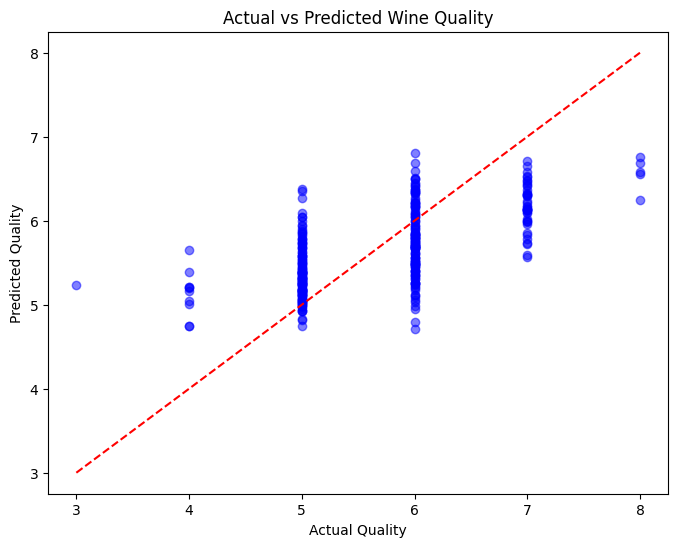

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Identity line
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.show()


<ipython-input-10-09028d757c7d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')


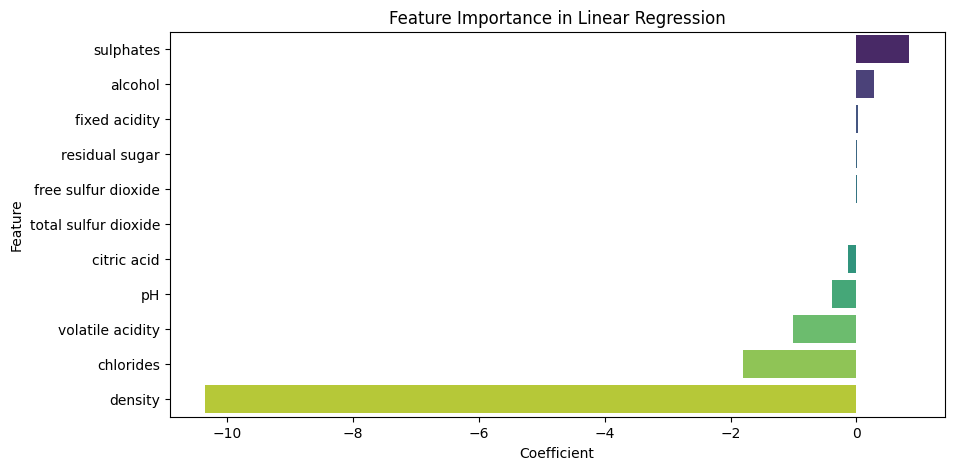

In [10]:
# Get feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance in Linear Regression")
plt.show()


## Gradient Descent

In [11]:

# Feature Scaling (Normalization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add bias term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Initialize model parameters (weights) randomly
theta = np.random.randn(X_train_b.shape[1], 1)

# Set hyperparameters
learning_rate = 0.001  # Reduced learning rate
n_iterations = 1000
m = X_train_b.shape[0]  # Number of training samples

y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

# Perform Gradient Descent
for iteration in range(n_iterations):
    gradients = (2/m) * X_train_b.T @ (X_train_b @ theta - y_train)
    theta -= learning_rate * gradients  # Update weights

    # Check for NaN values in theta
    if np.isnan(theta).any():
        print("NaN detected in theta. Stopping Gradient Descent.")
        break

# Print final theta values (model parameters)
print("Final parameters (theta):")
print(theta)

Final parameters (theta):
[[ 4.97366141]
 [ 0.37022529]
 [-0.15915686]
 [ 0.10334745]
 [ 0.49874079]
 [-0.42472332]
 [ 0.05713944]
 [-0.33663074]
 [-0.7234536 ]
 [ 0.27030496]
 [ 0.64944512]
 [-0.4630969 ]]


In [12]:
y_pred_gd = X_test_b @ theta  # Compute predictions


In [13]:
mse_gd = mean_squared_error(y_test, y_pred_gd)
mae_gd = mean_absolute_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

print(f"Gradient Descent - Mean Squared Error: {mse_gd:.2f}")
print(f"Gradient Descent - Mean Absolute Error: {mae_gd:.2f}")
print(f"Gradient Descent - R² Score: {r2_gd:.2f}")

Gradient Descent - Mean Squared Error: 1.13
Gradient Descent - Mean Absolute Error: 0.87
Gradient Descent - R² Score: -0.74


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Standardize features

Explained Variance Ratios: [0.2801769  0.17563995 0.13957636 0.11081822 0.09021248 0.05908698
 0.05266627 0.03883888 0.03129468 0.01600997 0.0056793 ]


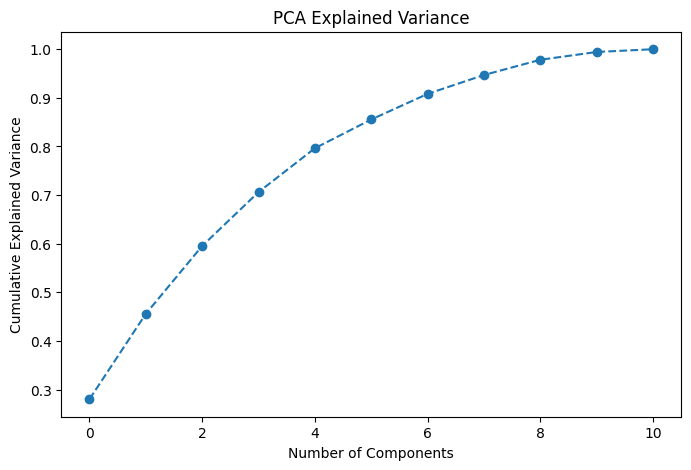

In [15]:
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)  # Transform data using PCA

# Explained variance ratio tells us how much variance each principal component explains
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)

# Plot the explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

In [16]:
k = 6 # Choose number of principal components (e.g., based on explained variance)
pca = PCA(n_components=k)
X_train_pca = pca.fit_transform(X_train_scaled)

print(f"New shape of dataset after PCA: {X_train_pca.shape}")

New shape of dataset after PCA: (1279, 6)


In [17]:
X_test_scaled = scaler.transform(X_test)  # Standardize test data
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA transformation


In [18]:
model = LinearRegression()
model.fit(X_train_pca, y_train)  # Train on reduced features

# Predict on test set
y_pred_pca = model.predict(X_test_pca)

# Evaluate performance
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print(f"PCA - Mean Squared Error: {mse_pca:.2f}")
print(f"PCA - R² Score: {r2_pca:.2f}")


PCA - Mean Squared Error: 0.40
PCA - R² Score: 0.38


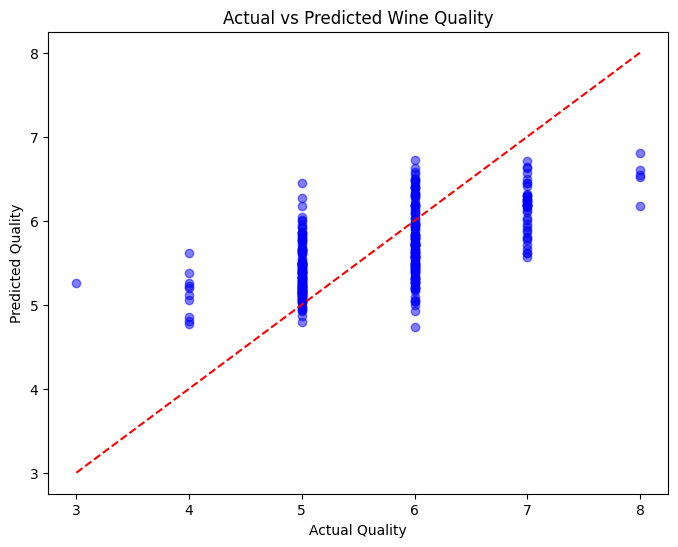

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_pca, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Identity line
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.show()

# Classification

In [24]:
red_wine = pd.read_csv('winequality_red.csv', delimiter=';')

white_wine = pd.read_csv('winequality_white.csv', delimiter=';')



In [25]:
red_wine['wine_type'] = 0
white_wine['wine_type'] = 1

In [26]:
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)
print(wine_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  wine_type  
0      9.4        5          0  
1      9.8        5 

Model Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       320
           1       0.99      0.95      0.97       980

    accuracy                           0.96      1300
   macro avg       0.93      0.96      0.95      1300
weighted avg       0.96      0.96      0.96      1300



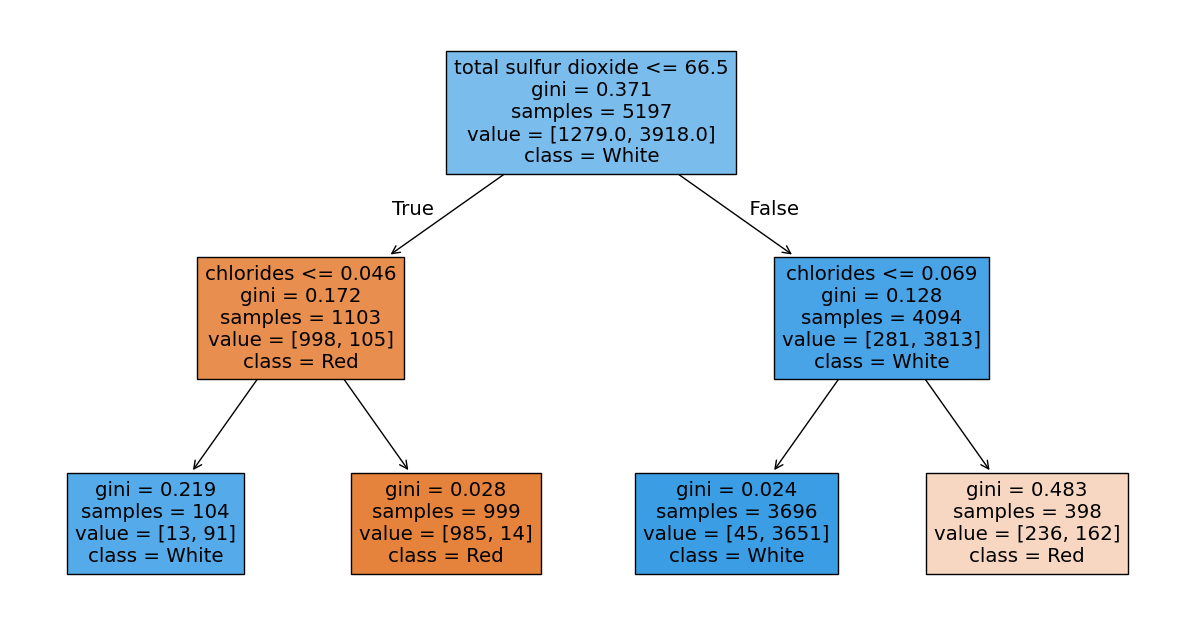

In [27]:
X = wine_data.drop(columns=["wine_type"])
y = wine_data["wine_type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(15, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=["Red", "White"], filled=True)
plt.show()

In [29]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       320
           1       0.99      0.97      0.98       980

    accuracy                           0.98      1300
   macro avg       0.96      0.98      0.97      1300
weighted avg       0.98      0.98      0.98      1300



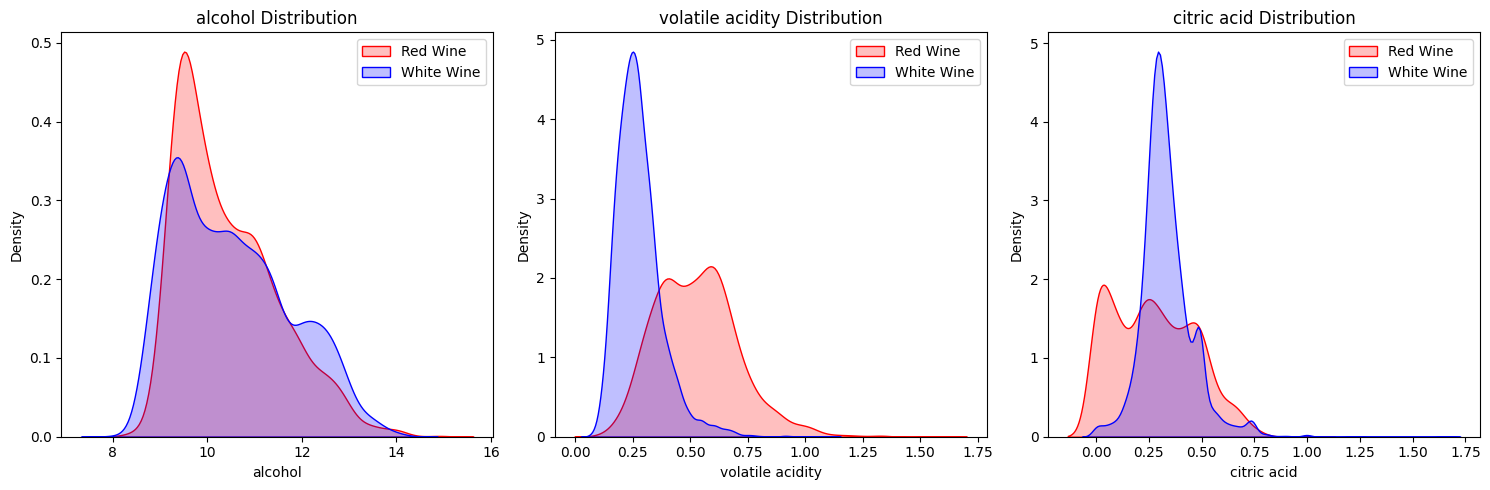

In [32]:
features = ["alcohol", "volatile acidity", "citric acid"]  # Choose key features

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, len(features), i + 1)
    sns.kdeplot(red_wine[feature], label="Red Wine", fill=True, color="red")
    sns.kdeplot(white_wine[feature], label="White Wine", fill=True, color="blue")
    plt.title(f"{feature} Distribution")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()

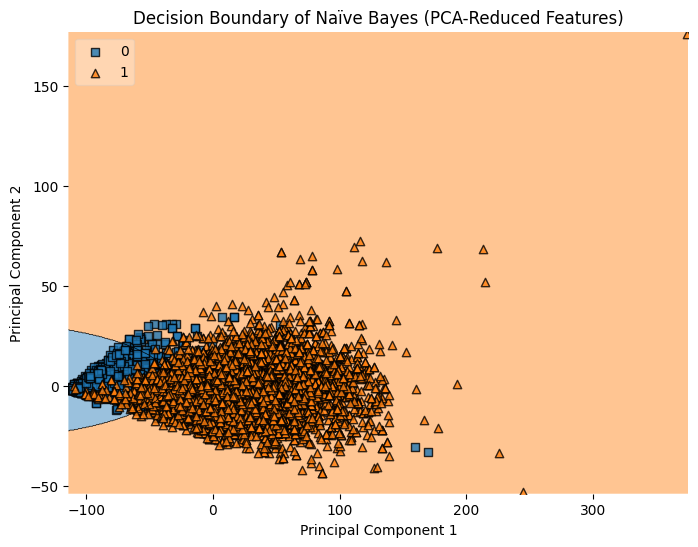

In [35]:
from mlxtend.plotting import plot_decision_regions


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

clf = GaussianNB()
clf.fit(X_train, y_train)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_pca, y.values, clf=clf, legend=2)
plt.title("Decision Boundary of Naïve Bayes (PCA-Reduced Features)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()